### MEMASUKKAN LIBRARY/TOOLS
---

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### MEMASUKKAN DATA

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper. [Source](http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv)

In [2]:
advert = pd.read_csv('Advertising.csv')
advert.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### DATA CLEANING/DATA CLEANSING

In [4]:
advert.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
advert.drop(['Unnamed: 0'], axis = 1, inplace = True)
advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### MELAKUKAN METODE EDA ( EXPLORATORY DATA ANALYSIS)

In [6]:
import seaborn as sns

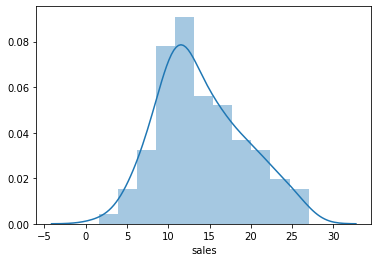

In [7]:
sns.distplot(advert.sales);

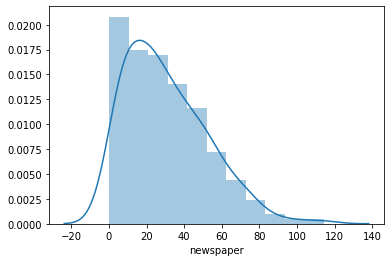

In [8]:
sns.distplot(advert.newspaper);

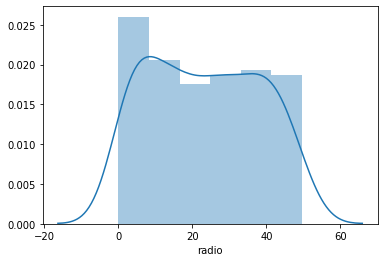

In [9]:
sns.distplot(advert.radio);

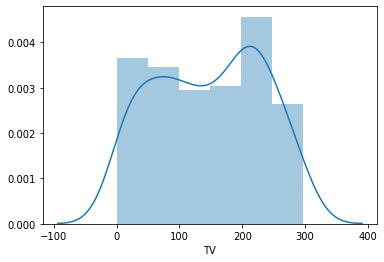

In [10]:
sns.distplot(advert.TV);

### MENCARI HUBUNGAN ANTARA VARIABEL (DATA LATIH) DENGAN TARGET ( DATA UJI)

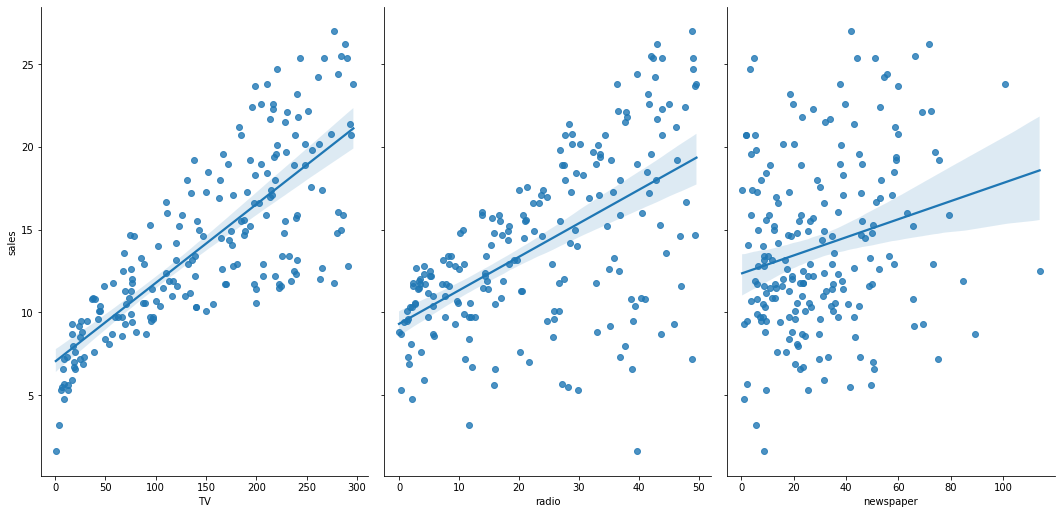

In [11]:
sns.pairplot(advert, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=7, aspect=0.7, kind='reg');

In [12]:
advert.TV.corr(advert.sales)

0.7822244248616061

In [13]:
advert.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


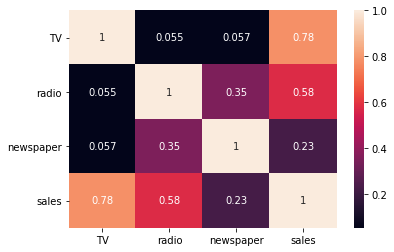

In [14]:
sns.heatmap( advert.corr(), annot=True );

### MEMBUAT MODEL SIMPLE LINEAR REGRESSION 

In [15]:
X = advert[['TV']]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [16]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [17]:
y = advert.sales
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [18]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150,)
(50,)


In [21]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Mencari Gradient (m) dan Intercept (b)

In [22]:
# print the intercept and coefficients
print("Intercept:",linreg.intercept_)
print("Gradient/slope Coefficient",linreg.coef_)

Intercept: 6.91197261886872
Gradient/slope Coefficient [0.04802945]


In [23]:
print(zip(advert.TV, linreg.coef_))


### Task 8: Making Predictions with our Model

In [24]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
print(y_pred)

[17.03658069 16.63793625 11.50839099 20.36982452 19.10184704 20.53312465
 14.75518181 15.59569719 10.30285179 17.25751616 14.81281715 10.23561056
 17.22389554 12.18560623 17.75702244 12.94927449 13.23745119 20.87413375
  8.14152654 17.03177774 11.7341294  10.16836933  8.11751182 12.07033555
 12.33449753 15.96072101  8.98204192 18.86169979 14.92328489 18.44384358
 18.43423769 18.17487866 14.10198129 15.08658502 18.84248801 15.79261793
 17.59372231 13.12698346 17.32475739  7.85334984  7.54115841 11.2538349
  7.81012333 16.71478337  7.2625876  13.98671061 10.66787561 17.86268723
 16.75800988 17.9347314 ]


In [27]:
y_pred = linreg.predict([[100]])
print("Harga", y_pred)

Harga [11.71491762]


In [28]:
from sklearn.metrics import mean_squared_error,r2_score

### Task 9: Model Evaluation Metrics

In [29]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:;
$$ \frac{1}{n} \sum_{i=1}^{n} \left |y_i - \hat{y}_i \right |$$

In [30]:
# calculate MAE by hand
print((10 + 0 + 20 + 10) / 4)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In [31]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2) / 4)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

In [35]:
# calculate RMSE by hand
print(np.sqrt(((10**2 + 0**2 + 20**2 + 10**2) / 4)))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


In [36]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(r2_score(y_test,y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [50, 1]

In [37]:
from scipy import stats

x = advert.iloc[:,0]
x.head()
y = advert.iloc[:,3]
y.head()


slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

fig,ax = plt.
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

SyntaxError: invalid syntax (<ipython-input-37-716d92472e72>, line 16)

In [38]:
from scipy import stats

x = advert.iloc[:,0]
x.head()
y = advert.iloc[:,3]
y.head()

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

speed = myfunc(100)

print(speed)


11.786257592429672


In [34]:
advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
